In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy
%matplotlib inline
import pylab
import scipy.interpolate as sp

# h/a vs. a

In [2]:
text_file1 = np.loadtxt('hoverrNoCommas.txt', dtype = 'float')
print text_file1 # Prints the text file as a 2d array.
print text_file1.shape

[[ 0.4076886  -0.63140897]
 [ 0.54223664 -0.66783315]
 [ 0.64981802 -0.7223981 ]
 [ 0.74841391 -0.78149655]
 [ 0.87389496 -0.85877652]
 [ 1.02620004 -0.98147974]
 [ 1.16955019 -1.09509559]
 [ 1.2949803  -1.195077  ]
 [ 1.38454995 -1.27687009]
 [ 1.48312546 -1.34504911]
 [ 1.55480563 -1.39958689]
 [ 1.65344227 -1.44052419]
 [ 1.73422    -1.44058531]
 [ 1.82400359 -1.42703237]
 [ 1.90483225 -1.40439206]
 [ 1.97661429 -1.41352697]
 [ 2.0573207  -1.4453701 ]
 [ 2.14691073 -1.51808262]
 [ 2.20959522 -1.58169419]
 [ 2.29013863 -1.68618192]
 [ 2.39754682 -1.81793176]
 [ 2.48705534 -1.92696657]
 [ 2.56768025 -1.99513201]
 [ 2.63041568 -2.03604214]
 [ 2.72904213 -2.08151972]
 [ 2.80976383 -2.10655243]
 [ 2.89948119 -2.12251135]
 [ 2.9623185  -2.11801861]
 [ 3.0611538  -2.0704203 ]
 [ 3.18694557 -2.0092215 ]
 [ 3.51940871 -1.84148216]
 [ 4.02259616 -1.58760641]
 [ 4.5527299  -1.32467045]
 [ 5.00200442 -1.09799567]
 [ 5.3883754  -0.9053255 ]
 [ 6.0622617  -0.57666404]
 [ 6.60139112 -0.3046543 ]
 

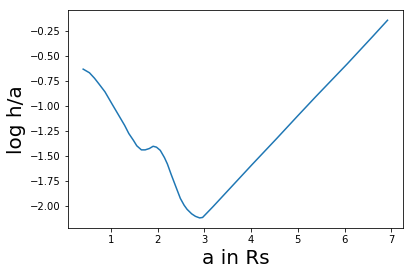

In [3]:
a = text_file1[:,0]
ratio = text_file1[:,1]
plt.plot(a,ratio) # Sets each column as the x and y coordinates, and creates and shows a plot.
plt.xlabel('a in Rs',fontsize=20)
plt.ylabel('log h/a',fontsize=20)

# h vs. a

In [4]:
a = text_file1[:,0]
ratio = text_file1[:,1]
ratio1 = 10**ratio
a1 = 10**a
height = ratio1*a1
print height
a1_in_rg = a1/(1.5*10**11)

h_=np.zeros((38,2))
h_[:,0]= a1_in_rg
h_[:,1] = height

[  5.97419825e-01   7.48864931e-01   8.46096548e-01   9.26653493e-01
   1.03542452e+00   1.10846071e+00   1.18701061e+00   1.25864514e+00
   1.28138566e+00   1.37428357e+00   1.42961383e+00   1.63274396e+00
   1.96623165e+00   2.49442940e+00   3.16548449e+00   3.65668312e+00
   4.09214110e+00   4.25429997e+00   4.24522814e+00   4.01750759e+00
   3.79852562e+00   3.63152274e+00   3.73721635e+00   3.92982799e+00
   4.44142580e+00   5.04907005e+00   5.98370042e+00   6.98714721e+00
   9.78889119e+00   1.50565013e+01   4.76350412e+01   2.72263709e+02
   1.69067236e+03   8.01694211e+03   3.04123448e+04   3.05912809e+05
   1.98032658e+06   6.01085228e+06]


# h vs a adjusted

In [5]:
print a1

[  2.55675200e+00   3.48527173e+00   4.46496464e+00   5.60291344e+00
   7.47988568e+00   1.06218469e+01   1.47757723e+01   1.97233327e+01
   2.42409675e+01   3.04176363e+01   3.58761336e+01   4.50238131e+01
   5.42275517e+01   6.66812275e+01   8.03215809e+01   9.47576526e+01
   1.14109211e+02   1.40252538e+02   1.62029921e+02   1.95046710e+02
   2.49773764e+02   3.06941310e+02   3.69555994e+02   4.26988011e+02
   5.35848641e+02   6.45303210e+02   7.93379902e+02   9.16892670e+02
   1.15120800e+03   1.53796188e+03   3.30680595e+03   1.05340691e+04
   3.57050712e+04   1.00462601e+05   2.44554357e+05   1.15414854e+06
   3.99384422e+06   8.32494014e+06]


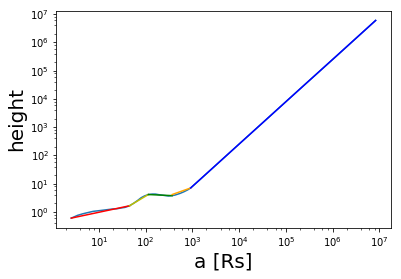

In [6]:
logPlot = plt.gca()
logPlot.loglog(a1,height)
plt.xlabel('a [Rs]',fontsize=20)
plt.ylabel('height',fontsize=20)
plt.plot([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
plt.plot([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
plt.plot([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
plt.plot([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
plt.plot([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b' )

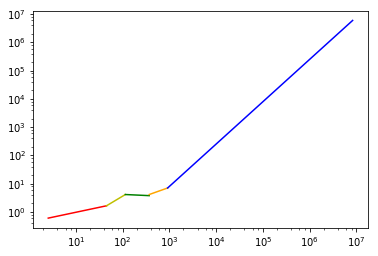

In [7]:
logPlot = plt.gca()
logPlot.loglog([2.55675200e+00,  4.50238131e+01], [ 5.97419825e-01,1.63274396e+00], c='r')
logPlot.loglog([4.50238131e+01,1.14109211e+02], [1.63274396e+00,4.09214110e+00], c='y')
logPlot.loglog([1.14109211e+02,3.69555994e+02], [4.09214110e+00, 3.73721635e+00 ], c='g')
logPlot.loglog([3.69555994e+02,9.16892670e+02],[4.09214110e+00,6.98714721e+00], color='orange')
logPlot.loglog([9.16892670e+02,8.32494014e+06],[6.98714721e+00, 6.01085228e+06], c='b')

# Surf.density vs a

In [8]:
text_file2 = np.loadtxt('SurfaceDensity.txt', dtype = 'float')
a2 = text_file2[:,0]
surface_density = text_file2[:,1]

In [9]:
unlog_sd = 10**text_file2[:,1]
unlog_a2 = 10**a2

In [10]:
print unlog_a2

[  2.59665597e+00   3.77204249e+00   6.60419396e+00   1.51418933e+01
   3.00246171e+01   3.77204249e+01   4.54629547e+01   5.71158648e+01
   6.60419396e+01   7.63629826e+01   9.39664831e+01   1.18051653e+02
   1.45265393e+02   1.75082703e+02   2.11020343e+02   2.65108360e+02
   3.40041193e+02   4.54629547e+02   5.59432571e+02   7.25037318e+02
   9.20373200e+02   1.48310251e+03   3.61874981e+03   1.13254132e+04
   3.85110700e+04   1.23052400e+05   3.19524751e+05   1.15628013e+06
   3.19524751e+06   8.64842328e+06]


In [11]:
def m(x1,x2,y1,y2):
    slope=(y2-y1)/(x2-x1)
    return slope
def b(x1,x2,y1,y2):
    yint=y1-(m(x1,x2,y1,y2)*x1)
    return yint

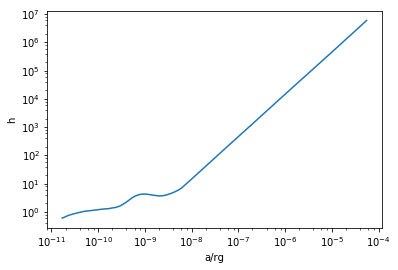

In [12]:
logPlot=plt.gca()
logPlot.loglog(a1_in_rg,height)
logPlot.set_xlabel('a/rg') 
logPlot.set_ylabel('h')
for i in range(len(h_)-1):
    j=i+1
    rad = np.arange(h_[i,0],h_[j,0],h_[j,0]/h_[i,0])
    h_p= (m(h_[i,0],h_[j,0],h_[i,1],h_[j,1])*rad)+b(h_[i,0],h_[j,0],h_[i,1],h_[j,1])

    logPlot=plt.gca()
    logPlot.loglog(rad,h_p)

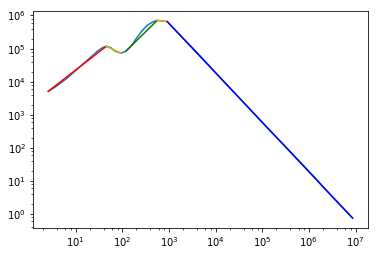

In [13]:
logPlot=plt.gca()
logPlot.loglog(unlog_a2,unlog_sd)
plt.plot([2.59665597, 4.54629547e+01], [5.09440915e+03, 1.16509558e+05], c='r')
plt.plot([4.54629547e+01,9.39664831e+01], [1.16509558e+05, 7.25123365e+04], c='y')
plt.plot([1.18051653e+02, 5.59432571e+02], [8.22871096e+04,7.06269175e+05], c='g')
plt.plot([5.59432571e+02,9.20373200e+02],[7.06269175e+05,6.52597355e+05], color='orange')
plt.plot([9.20373200e+02, 8.64842328e+06],[ 6.52597355e+05,7.40568469e-01], c='b' )

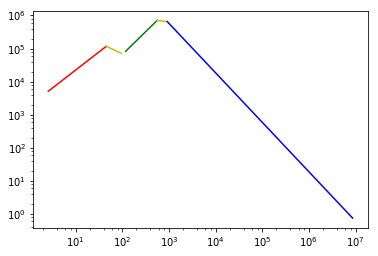

In [14]:
logPlot=plt.gca()
logPlot.loglog([2.59665597, 4.54629547e+01], [5.09440915e+03, 1.16509558e+05], c='r')
logPlot.loglog([4.54629547e+01,9.39664831e+01], [1.16509558e+05, 7.25123365e+04], c='y')
plt.plot([1.18051653e+02, 5.59432571e+02], [8.22871096e+04,7.06269175e+05], c='g')
logPlot.loglog([5.59432571e+02,9.20373200e+02],[7.06269175e+05,6.52597355e+05], color='orange')
logPlot.loglog([9.20373200e+02, 8.64842328e+06],[ 6.52597355e+05,7.40568469e-01], c='b')

# This is velocity vs. distance

In [17]:
c = 6.67e-11*2*1.99e30*10**8
d = text_file1[:,0]
distance2= 10**d

distance_in_meters = distance2*(2*c)
speed_of_light_squared=(3e8)**2
distance = (distance_in_meters/speed_of_light_squared)

distance_in_rg = distance/(1.5*10**11)
velocity = (c/distance)**(1/2.0)*10**(-3)

print distance_in_rg
print velocity

[  1.00552700e+01   1.37069799e+01   1.75599452e+01   2.20353040e+01
   2.94171160e+01   4.17739144e+01   5.81105952e+01   7.75685071e+01
   9.53355951e+01   1.19627381e+02   1.41094721e+02   1.77070986e+02
   2.13267722e+02   2.62245907e+02   3.15891093e+02   3.72665704e+02
   4.48772088e+02   5.51589336e+02   6.37236074e+02   7.67085479e+02
   9.82317660e+02   1.20714788e+03   1.45340076e+03   1.67927110e+03
   2.10740141e+03   2.53786758e+03   3.12022799e+03   3.60598266e+03
   4.52750494e+03   6.04854204e+03   1.30051044e+04   4.14286993e+04
   1.40421962e+05   3.95102292e+05   9.61790620e+05   4.53906956e+06
   1.57071089e+07   3.27405712e+07]
[  1.32666709e+05   1.13628673e+05   1.00391570e+05   8.96188363e+04
   7.75637462e+04   6.50887959e+04   5.51862853e+04   4.77656956e+04
   4.30855144e+04   3.84630328e+04   3.54163206e+04   3.16144128e+04
   2.88068823e+04   2.59779253e+04   2.36695572e+04   2.17921013e+04
   1.98584755e+04   1.79122810e+04   1.66651277e+04   1.51892714e+0

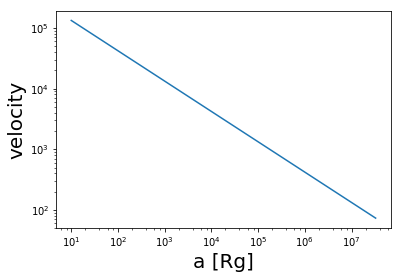

In [22]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,velocity)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('velocity',fontsize=20)

# T Orbit vs. Distance

In [ ]:
pi = 3.14
T_Orb = (2*np.pi*distance_in_rg*1.5*10**8)/velocity
print T_Orb
print distance_in_rg

In [ ]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,T_Orb)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t orbit',fontsize=20)

# Time in disk vs Distance

In [ ]:
t_in_disk = (ratio1*T_Orb)/2*np.pi
print t_in_disk

In [ ]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_in_disk)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk',fontsize=20)

In [ ]:
t_over_T = t_in_disk/T_Orb
print t_over_T

In [ ]:
logPlot=plt.gca()
logPlot.loglog(distance_in_rg,t_over_T)
plt.xlabel('a [Rg]',fontsize=20)
plt.ylabel('t in disk/t Orb',fontsize=20)

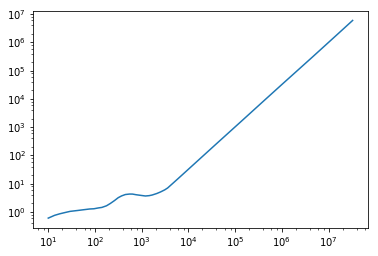

In [18]:
logPlot = plt.gca()
logPlot.loglog(distance_in_rg,height)

In [19]:
print distance_in_rg
print height

[  1.00552700e+01   1.37069799e+01   1.75599452e+01   2.20353040e+01
   2.94171160e+01   4.17739144e+01   5.81105952e+01   7.75685071e+01
   9.53355951e+01   1.19627381e+02   1.41094721e+02   1.77070986e+02
   2.13267722e+02   2.62245907e+02   3.15891093e+02   3.72665704e+02
   4.48772088e+02   5.51589336e+02   6.37236074e+02   7.67085479e+02
   9.82317660e+02   1.20714788e+03   1.45340076e+03   1.67927110e+03
   2.10740141e+03   2.53786758e+03   3.12022799e+03   3.60598266e+03
   4.52750494e+03   6.04854204e+03   1.30051044e+04   4.14286993e+04
   1.40421962e+05   3.95102292e+05   9.61790620e+05   4.53906956e+06
   1.57071089e+07   3.27405712e+07]
[  5.97419825e-01   7.48864931e-01   8.46096548e-01   9.26653493e-01
   1.03542452e+00   1.10846071e+00   1.18701061e+00   1.25864514e+00
   1.28138566e+00   1.37428357e+00   1.42961383e+00   1.63274396e+00
   1.96623165e+00   2.49442940e+00   3.16548449e+00   3.65668312e+00
   4.09214110e+00   4.25429997e+00   4.24522814e+00   4.01750759e+0

In [21]:
np.arcsin(4.76350412e+01/(2*1.30051044e+04))

0.001831398901656361